In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# fetch the dataset.
digits, targets = load_digits(return_X_y=True)
digits = digits.astype(np.float32) / 255

digits_train, digits_test, targets_train, targets_test = train_test_split(digits, targets, random_state=0)

train_size = digits_train.shape[0]
test_size = digits_test.shape[0]

input_size = 8*8
classes_n = 10

In [ ]:
digits[7]

array([0.        , 0.        , 0.02745098, 0.03137255, 0.05098039,
       0.0627451 , 0.05882353, 0.00392157, 0.        , 0.        ,
       0.02745098, 0.02745098, 0.01568628, 0.04313726, 0.04705882,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03137255, 0.05098039, 0.00392157, 0.        , 0.        ,
       0.01568628, 0.03137255, 0.03137255, 0.05882353, 0.05882353,
       0.02352941, 0.        , 0.        , 0.00784314, 0.04313726,
       0.05882353, 0.05882353, 0.01568628, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.0627451 , 0.01960784,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03529412, 0.05882353, 0.00392157, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.05098039, 0.01960784,
       0.        , 0.        , 0.        , 0.        ], dtype=float32)

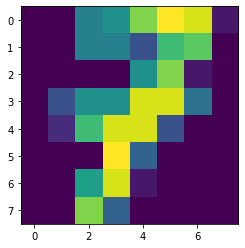

In [ ]:
plt.imshow(digits[7].reshape((8,8)))

In [ ]:
class Linear:
    def __init__(self, input_size, output_size):
        # Trainable parameters of the layer and their gradients
        self.thetas = np.random.randn(input_size, output_size) # the weight matrix of the layer (W)
        self.thetas_grads = np.empty_like(self.thetas) # gradient w.r.t. the weight matrix of the layer
        self.bias = np.random.randn(output_size) # bias terms of the layer (b)
        self.bias_grads = np.empty_like(self.bias) # gradient w.r.t. bias terms of the linear layer

    def forward(self, x):
        #to do
        output = ...
        #end to do

        return output

    def backward(self, x, output_grad):

        input_grad = output_grad@(self.thetas).T
        #
        self.thetas_grads = x.T@output_grad
        self.bias_grads = output_grad.reshape(-1)

        ### END Solution
        return input_grad

In [ ]:
class LogisticActivation:
    def __init__(self):
        # the layer has no parameters
        pass

    def forward(self, x):
        #to do
        output = ...
        #end to do


    def backward(self, x, output_grad):




        inp_size = np.size(x,1)
        u_vec = np.ones((1,inp_size))
        sgm = self.forward(x)
        d_out_dx =  (sgm.T*(u_vec - sgm))*np.diag(np.ones((inp_size))) # construct sgm*(1-sgm) matrix with only diagonal
                                                                        # elements being non-zero
        input_grad = output_grad@d_out_dx.T

        ### END Solution
        return input_grad



In [ ]:
class MLP:
    def __init__(self, input_size, hidden_layer_size, output_size):
        self.linear1 = Linear(input_size, hidden_layer_size)
        self.activation1 = LogisticActivation()
        self.linear2 = Linear(hidden_layer_size, output_size)

    def forward(self, x):
        return ...

    def backward(self, x, output_grad):
        print



        lin1_forward = self.linear1.forward(x)
        act_forward = self.activation1.forward(lin1_forward)

        lin2_backward = self.linear2.backward(act_forward, output_grad)
        act1_backward = self.activation1.backward(lin1_forward, lin2_backward)
        lin1_backward = self.linear1.backward(x, act1_backward)



        input_grad = lin1_backward

        return input_grad

In [ ]:
### BEGIN Solution
def softmax_crossentropy_with_logits(logits, reference_answers):
    ex = np.exp(logits)
    p_i = ex/np.sum(ex)
    return -np.sum(np.log(p_i)*reference_answers)

def grad_softmax_crossentropy_with_logits(logits, reference_answers):
    ex = np.exp(logits)
    p_i = ex/np.sum(ex)
    return p_i - reference_answers
### END Solution

## SGD

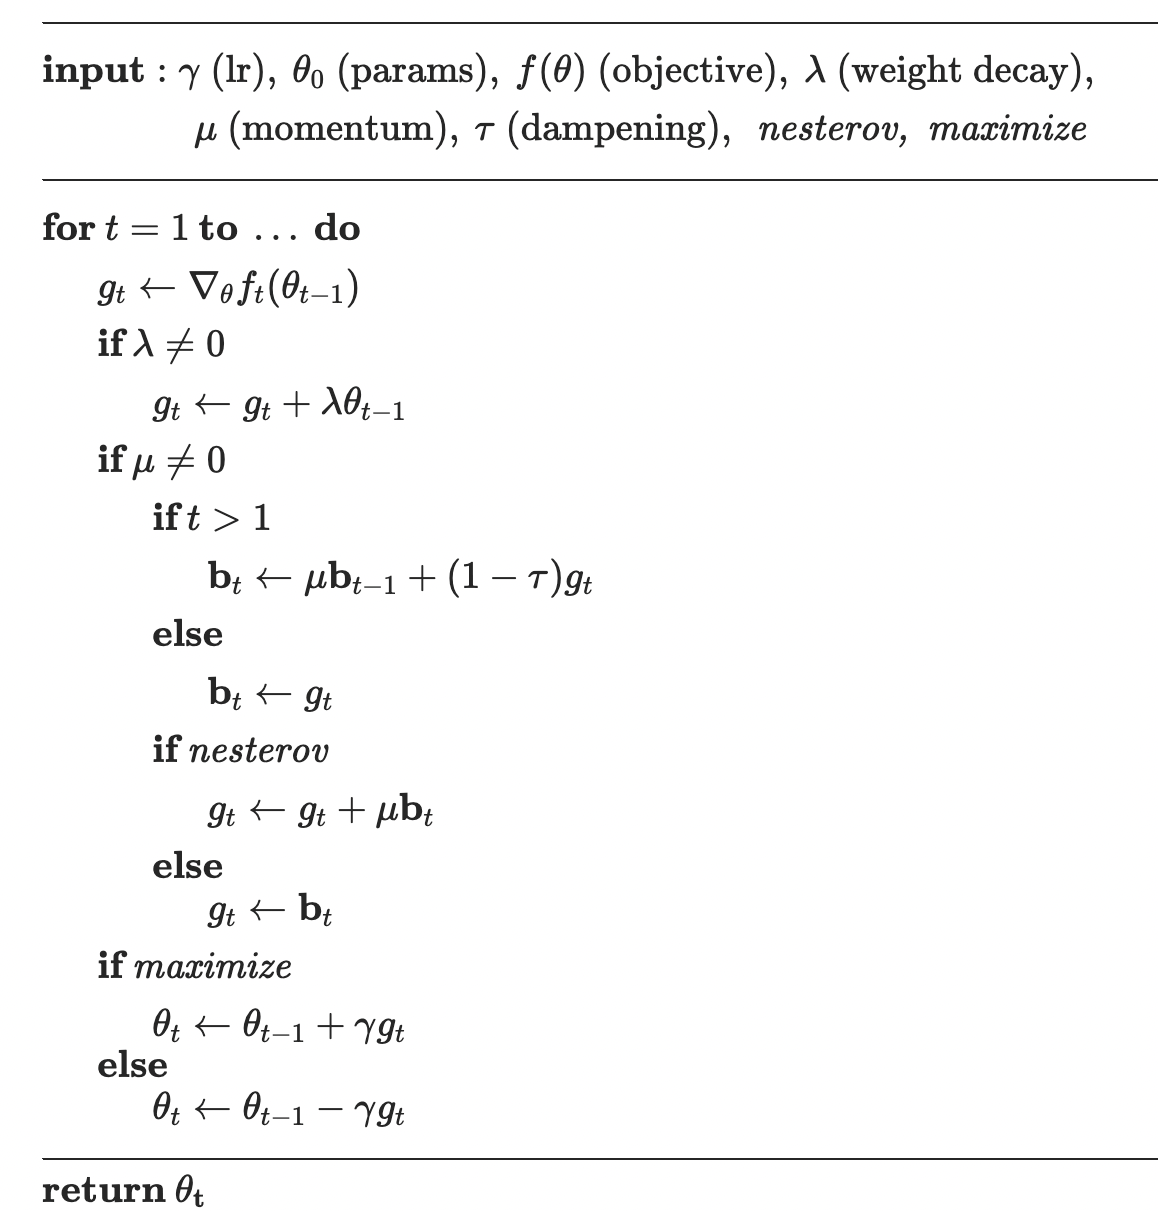

ADAGRAD

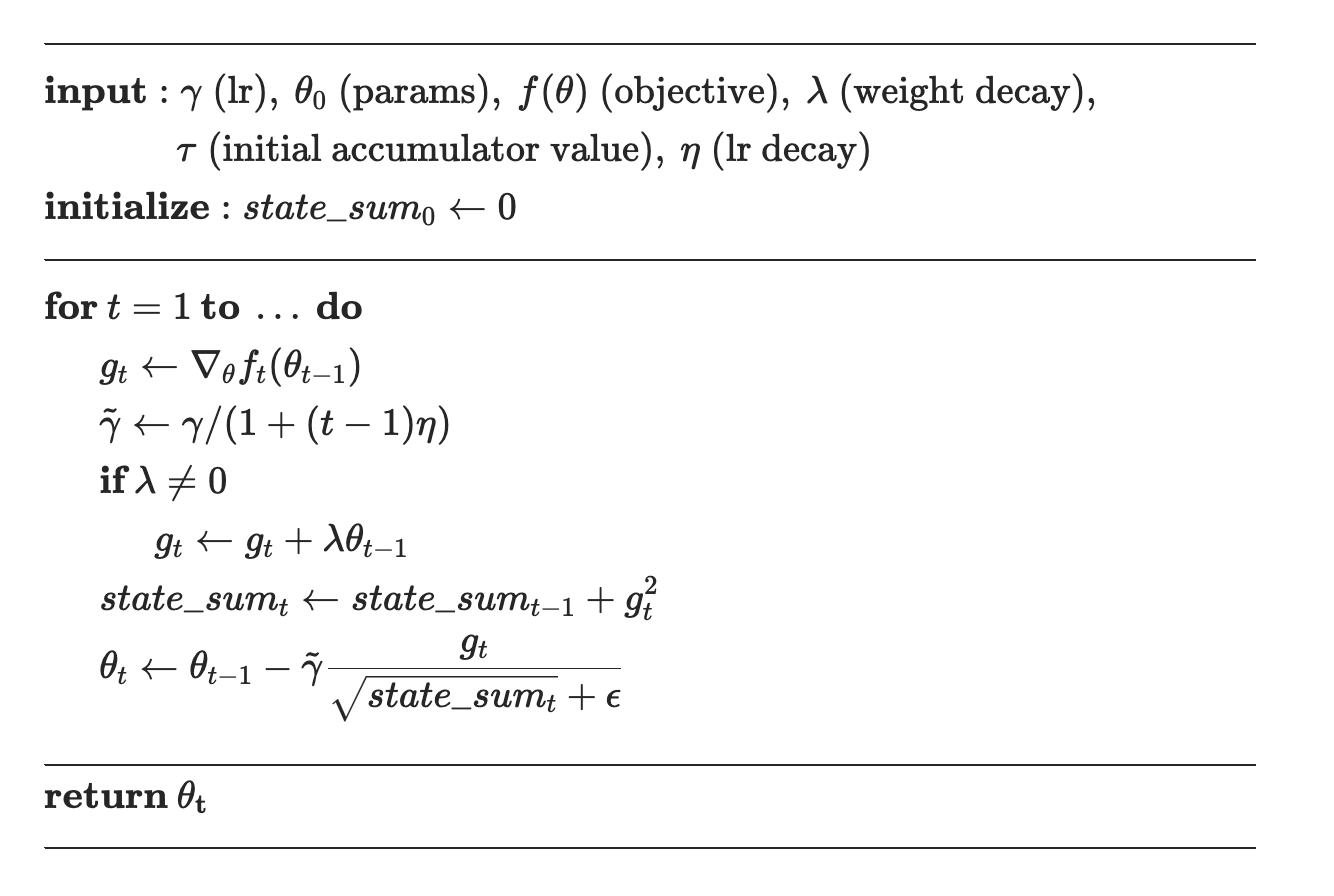

# RMSProp

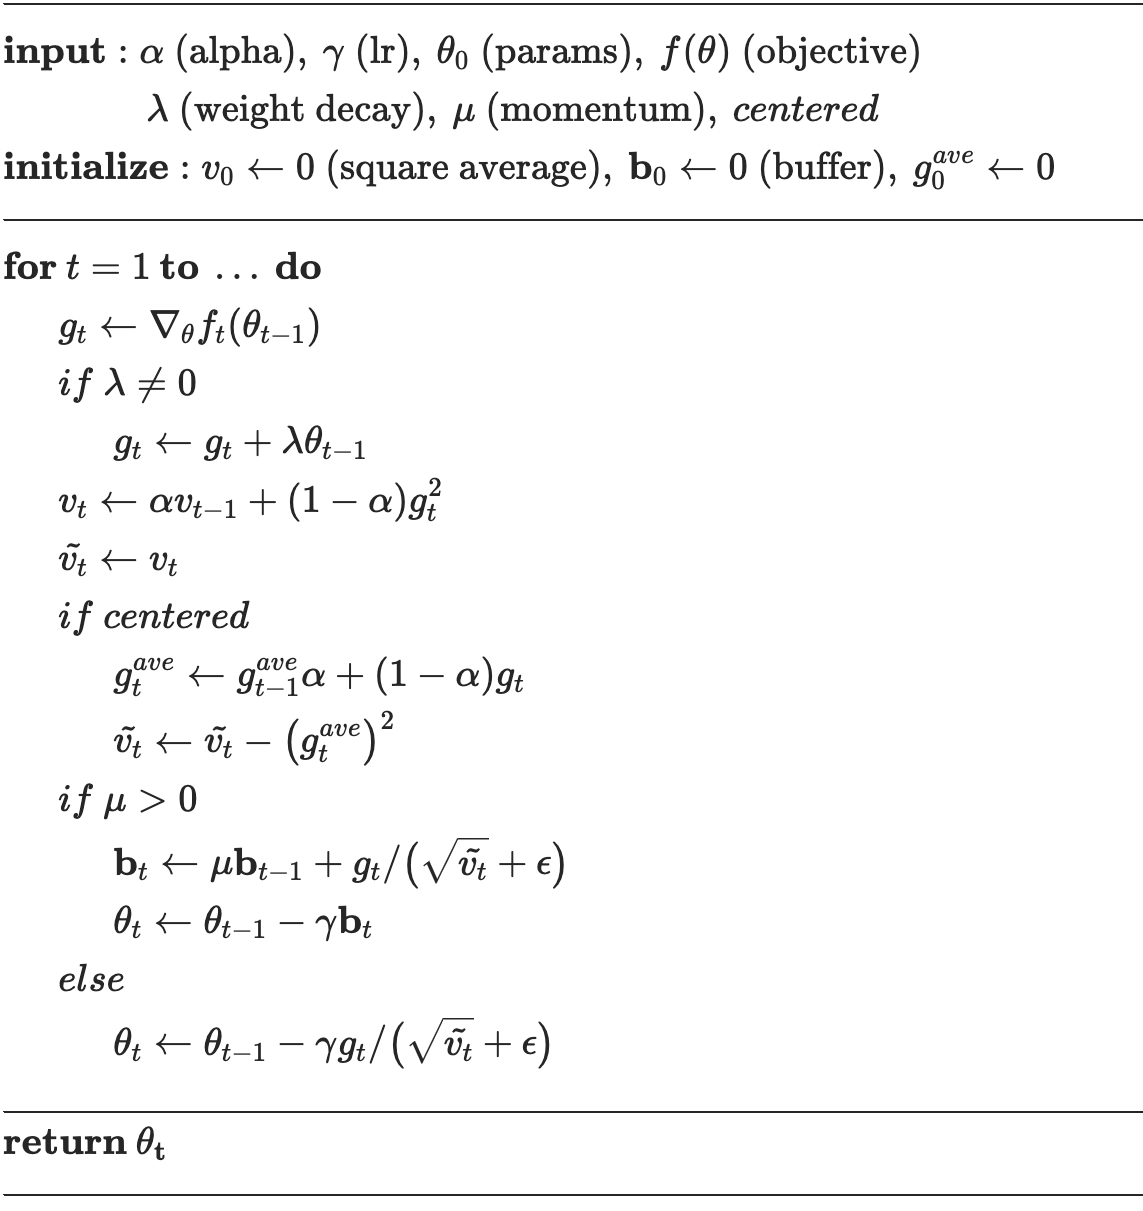

ADAM

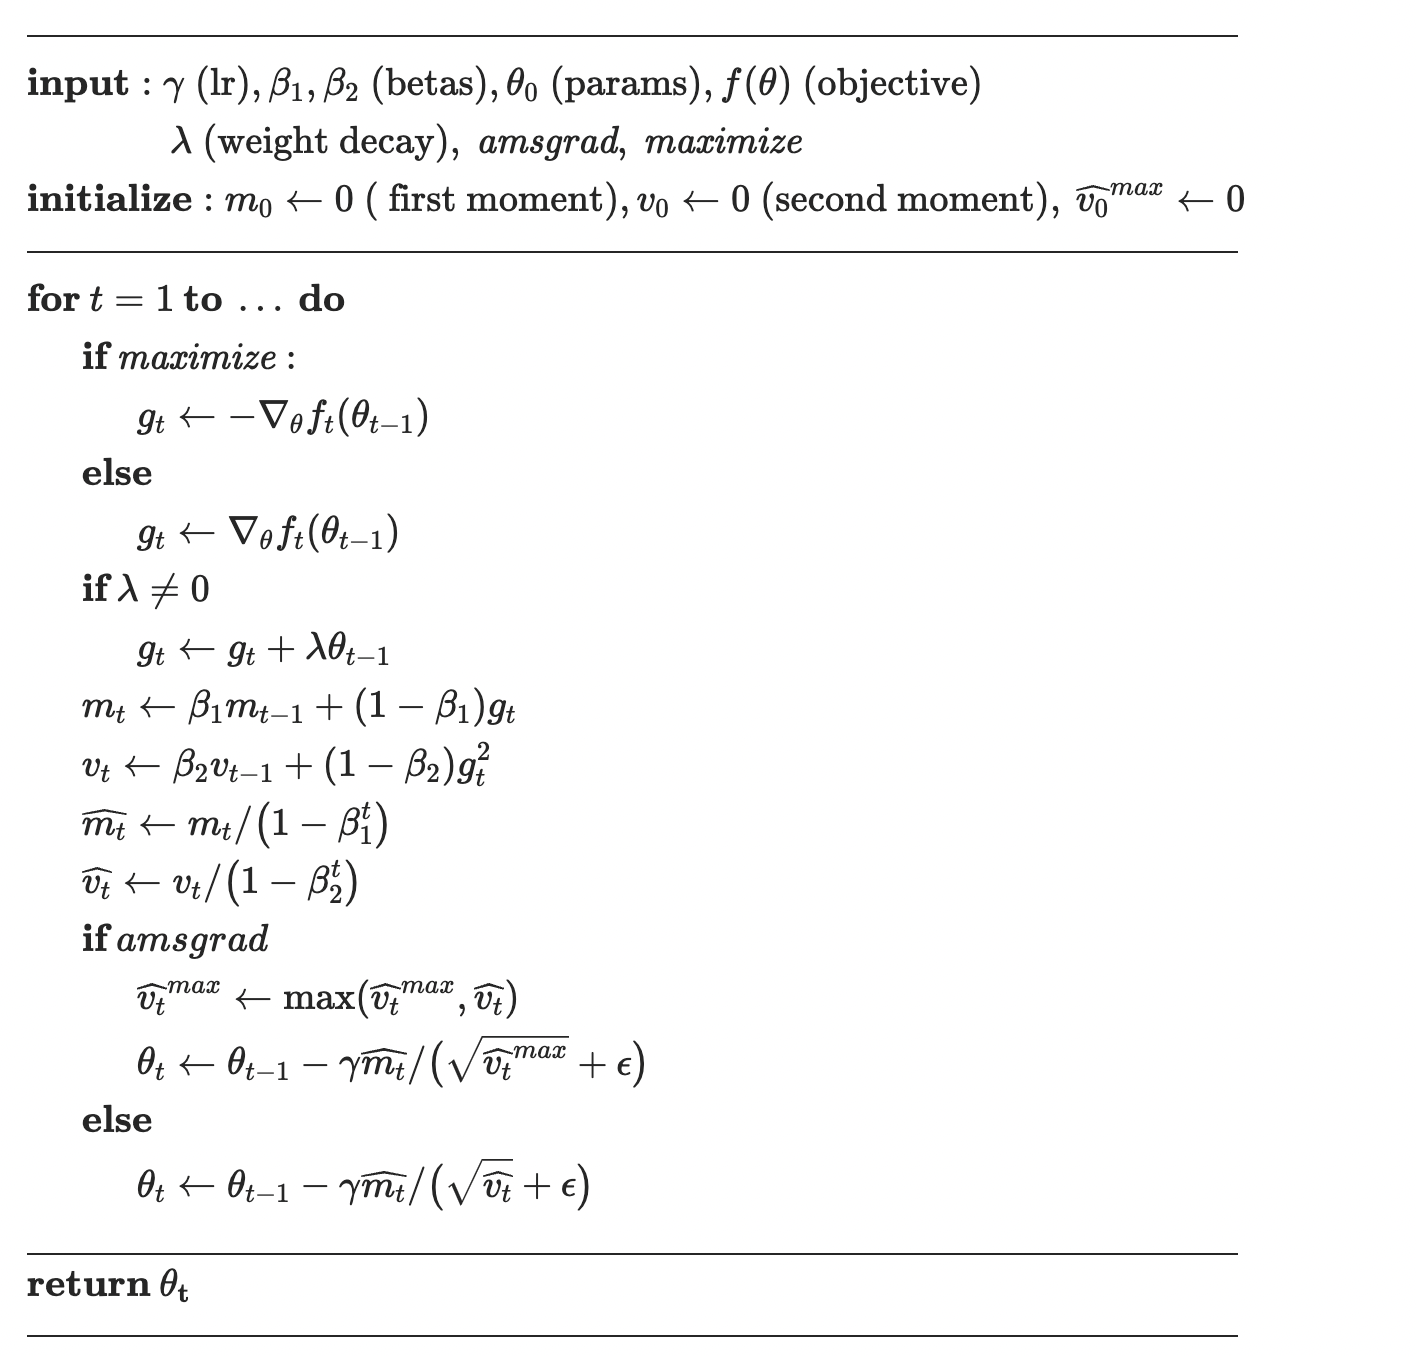

In [ ]:
class optimizer():
  def __init__(self, mlp, lr):
    self.step = 1
    self.m = [0]*4
    self.v = [0]*4
    self.mlp = mlp
    self.lr = lr
    self.beta1 =0.9
    self.beta2 = 0.999
    self.epsilon = 1e-4
    self.alpha = 0.9

  def zero_grad(self):

      self.mlp.linear1.thetas_grads = np.zeros_like(self.mlp.linear1.thetas)
      self.mlp.linear1.bias_grads = np.zeros_like(self.mlp.linear1.bias)
      self.mlp.linear2.thetas_grads = np.zeros_like(self.mlp.linear2.thetas)
      self.mlp.linear2.bias_grads = np.zeros_like(self.mlp.linear2.bias)

  def sgd_step(self, x, out, reference_answers ):

        grad_out = grad_softmax_crossentropy_with_logits(out, reference_answers)
        inp_grad = self.mlp.backward(x, grad_out)


        self.mlp.linear1.thetas -= self.mlp.linear1.thetas_grads* self.lr
        self.mlp.linear1.bias -= self.mlp.linear1.bias_grads*self.lr
        self.mlp.linear2.thetas -= self.mlp.linear2.thetas_grads*self.lr
        self.mlp.linear2.bias -= self.mlp.linear2.bias_grads*self.lr

  def AdaGrad_step(self, x, out, reference_answers):
      grad_out = grad_softmax_crossentropy_with_logits(out, reference_answers)
      inp_grad = self.mlp.backward(x, grad_out)
      weights = [self.mlp.linear1.thetas, self.mlp.linear1.bias , self.mlp.linear2.thetas,  self.mlp.linear2.bias]
      grads = [self.mlp.linear1.thetas_grads, self.mlp.linear1.bias_grads, self.mlp.linear2.thetas_grads, self.mlp.linear2.bias_grads]
      #to do
      for i, (weight, grad) in enumerate(zip(weights, grads)):
        #todo
        ...
        #endtodo

      self.mlp.linear1.thetas, self.mlp.linear1.bias , self.mlp.linear2.thetas,  self.mlp.linear2.bias = weights
      self.step +=1

  def RMSprop_step(self, x, out, reference_answers):
      grad_out = grad_softmax_crossentropy_with_logits(out, reference_answers)
      inp_grad = self.mlp.backward(x, grad_out)
      weights = [self.mlp.linear1.thetas, self.mlp.linear1.bias , self.mlp.linear2.thetas,  self.mlp.linear2.bias]
      grads = [self.mlp.linear1.thetas_grads, self.mlp.linear1.bias_grads, self.mlp.linear2.thetas_grads, self.mlp.linear2.bias_grads]
      for i, (weight, grad) in enumerate(zip(weights, grads)):
         #todo
        ...
        #endtodo

      self.mlp.linear1.thetas, self.mlp.linear1.bias , self.mlp.linear2.thetas,  self.mlp.linear2.bias = weights
      self.step +=1


  def Adam_step(self, x, out, reference_answers):
      # print('step', np.linalg.norm(self.mlp.linear2.bias_grads))
      change = np.zeros(x.shape)
      grad_out = grad_softmax_crossentropy_with_logits(out, reference_answers)
      inp_grad = self.mlp.backward(x, grad_out)
      weights = [self.mlp.linear1.thetas, self.mlp.linear1.bias , self.mlp.linear2.thetas,  self.mlp.linear2.bias]
      grads = [self.mlp.linear1.thetas_grads, self.mlp.linear1.bias_grads, self.mlp.linear2.thetas_grads, self.mlp.linear2.bias_grads]
      for i, (weight, grad) in enumerate(zip(weights, grads)):
        #todo
        ...
        #endtodo


      self.mlp.linear1.thetas, self.mlp.linear1.bias , self.mlp.linear2.thetas,  self.mlp.linear2.bias = weights
      self.step +=1








In [ ]:
loss_train = {'sgd' : [],
                'adagrad' : [],
                'rmsprop' : [],
                'adam' : []}

In [ ]:
train_size

1347

In [ ]:
from tqdm import tqdm

In [ ]:
def train_mlp(input_size, classes_n, digits_train, targets_train, digits_test, targets_test, epochs =100, lr=1e-2, optim = 'sgd'):
  mlp = MLP(input_size=input_size, hidden_layer_size=100, output_size=classes_n)
  opt = optimizer(mlp, lr)
  # print(opt)
  x_train = digits_train
  x_test = digits_test
  y_train = targets_train
  y_test = targets_test

  loss_test = []
  for epoch in range(epochs):

    n=0
    for sample_i in range(train_size):

        x = x_train[sample_i].reshape((1, -1))
        target = np.array([y_train[sample_i]])

        opt.zero_grad()

        out = (opt.mlp.forward(x)).reshape(-1)
        reference_answers = np.zeros((1,classes_n))
        reference_answers[:,target] = 1


        loss_train[optim].append(softmax_crossentropy_with_logits(out, reference_answers))

        if optim == "sgd":
          opt.sgd_step( x, out, reference_answers)

        elif optim == "adagrad":
          opt.AdaGrad_step( x, out, reference_answers)

        elif  optim == "rmsprop":
          opt.RMSprop_step( x, out, reference_answers)

        elif optim == "adam":
          opt.Adam_step( x, out, reference_answers)
    test_predict = []
    for test_sample_i in range(test_size):
        x = x_test[test_sample_i].reshape((1, -1))
        target = np.array([y_test[test_sample_i]])

        out = opt.mlp.forward(x)

        reference_answers_test = np.zeros((1,classes_n))
        reference_answers_test[:,target] = 1
        # loss_test[epoch, test_sample_i] = softmax_crossentropy_with_logits(out, reference_answers_test)

        pred = np.argmax(out)
        test_predict.append(pred)

    if epoch % 10 == 0:
        acc = accuracy_score(y_test, test_predict)
        print('Starting epoch {}'.format(epoch),', Accuracy on test: ', acc)
        print()

In [ ]:
optimizers = ['sgd','adagrad' ,    'rmsprop',  'adam' ]


In [ ]:
for op in optimizers:
   print(op)
   train_mlp(64, 10, digits_train, targets_train, digits_test, targets_test, epochs =100, lr=1e-2, optim =op)

sgd
Starting epoch 0 , Accuracy on test:  0.17555555555555555

Starting epoch 10 , Accuracy on test:  0.6711111111111111

Starting epoch 20 , Accuracy on test:  0.8311111111111111

Starting epoch 30 , Accuracy on test:  0.8955555555555555

Starting epoch 40 , Accuracy on test:  0.9088888888888889

Starting epoch 50 , Accuracy on test:  0.9222222222222223

Starting epoch 60 , Accuracy on test:  0.9288888888888889

Starting epoch 70 , Accuracy on test:  0.9311111111111111

Starting epoch 80 , Accuracy on test:  0.9377777777777778

Starting epoch 90 , Accuracy on test:  0.9422222222222222

adagrad
Starting epoch 0 , Accuracy on test:  0.40444444444444444

Starting epoch 10 , Accuracy on test:  0.82

Starting epoch 20 , Accuracy on test:  0.8644444444444445

Starting epoch 30 , Accuracy on test:  0.8777777777777778

Starting epoch 40 , Accuracy on test:  0.8844444444444445

Starting epoch 50 , Accuracy on test:  0.8911111111111111

Starting epoch 60 , Accuracy on test:  0.9

Starting epoch

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


adam
Starting epoch 0 , Accuracy on test:  0.7911111111111111

Starting epoch 10 , Accuracy on test:  0.9466666666666667

Starting epoch 20 , Accuracy on test:  0.9777777777777777

Starting epoch 30 , Accuracy on test:  0.9688888888888889

Starting epoch 40 , Accuracy on test:  0.9711111111111111

Starting epoch 50 , Accuracy on test:  0.9777777777777777

Starting epoch 60 , Accuracy on test:  0.9844444444444445

Starting epoch 70 , Accuracy on test:  0.9844444444444445

Starting epoch 80 , Accuracy on test:  0.9777777777777777

Starting epoch 90 , Accuracy on test:  0.9866666666666667



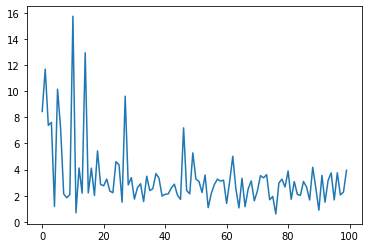

In [ ]:
plt.plot(loss_train['rmsprop'][:100])